<a href="https://colab.research.google.com/github/arifariofficial/google-collab/blob/main/PyTorch_advance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


In [3]:
print("PyTorch version:", torch.__version__)


PyTorch version: 2.5.1+cu121


###  Build a Deeper Neural Network

####  Define the Dataset
For simplicity, let’s continue with synthetic data:

In [4]:
# Synthetic data for training
X = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0]])
Y = torch.tensor([[2.0], [4.0], [6.0], [8.0], [10.0], [12.0]])


#### Define a Deeper Model
Add multiple layers and activation functions:

In [6]:
# Define a deeper neural network
class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.hidden1 = nn.Linear(1, 10)  # 1 input, 10 neurons in hidden layer 1
        self.hidden2 = nn.Linear(10, 10) # 10 neurons in hidden layer 2
        self.output = nn.Linear(10, 1)   # 1 output
        self.activation = nn.ReLU()     # ReLU activation function

    def forward(self, x):
        x = self.activation(self.hidden1(x))  # Hidden layer 1
        x = self.activation(self.hidden2(x))  # Hidden layer 2
        x = self.output(x)                    # Output layer
        return x

# Initialize the model
model = DeepNN()


#### Define Loss and Optimizer

In [7]:
# Mean Squared Error loss
criterion = nn.MSELoss()

# Optimizer with a learning rate of 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)


#### Train the Model
Update the training loop for this deeper network:

In [9]:
# Training loop
for epoch in range(4000):  # Increase epochs for better training
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, Y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:  # Print loss every 20 epochs
        print(f"Epoch [{epoch + 1}/4000], Loss: {loss.item():.4f}")


Epoch [100/4000], Loss: 0.2355
Epoch [200/4000], Loss: 0.1338
Epoch [300/4000], Loss: 0.0781
Epoch [400/4000], Loss: 0.0467
Epoch [500/4000], Loss: 0.0289
Epoch [600/4000], Loss: 0.0185
Epoch [700/4000], Loss: 0.0122
Epoch [800/4000], Loss: 0.0084
Epoch [900/4000], Loss: 0.0059
Epoch [1000/4000], Loss: 0.0043
Epoch [1100/4000], Loss: 0.0033
Epoch [1200/4000], Loss: 0.0026
Epoch [1300/4000], Loss: 0.0021
Epoch [1400/4000], Loss: 0.0017
Epoch [1500/4000], Loss: 0.0015
Epoch [1600/4000], Loss: 0.0013
Epoch [1700/4000], Loss: 0.0012
Epoch [1800/4000], Loss: 0.0011
Epoch [1900/4000], Loss: 0.0010
Epoch [2000/4000], Loss: 0.0010
Epoch [2100/4000], Loss: 0.0010
Epoch [2200/4000], Loss: 0.0010
Epoch [2300/4000], Loss: 0.0010
Epoch [2400/4000], Loss: 0.0011
Epoch [2500/4000], Loss: 0.0011
Epoch [2600/4000], Loss: 0.0012
Epoch [2700/4000], Loss: 0.0013
Epoch [2800/4000], Loss: 0.0014
Epoch [2900/4000], Loss: 0.0016
Epoch [3000/4000], Loss: 0.0017
Epoch [3100/4000], Loss: 0.0019
Epoch [3200/4000]

#### Evaluate the Model:
Test your model on some unseen data (e.g., torch.tensor([[7.0]])) to see how well it generalizes:

In [19]:
with torch.no_grad():
    test_input = torch.tensor([[7.0]])
    predicted_output = model(test_input)
    print(f"Prediction for input 7.0: {predicted_output.item():.2f}")


Prediction for input 7.0: 14.09


#### Save and Load the Model
Saving and loading models is essential for reusing them

In [21]:
# Save the model
torch.save(model.state_dict(), "deep_nn_model_trained.pth")
print("Model saved!")

Model saved!


In [23]:
# Load the model and test it
loaded_model = DeepNN()
loaded_model.load_state_dict(torch.load("deep_nn_model_trained.pth", weights_only=False))

# Test the loaded model
with torch.no_grad():
    test_input = torch.tensor([[8.0]])
    predicted_output = loaded_model(test_input)
    print(f"Prediction for input 8.0 (loaded model): {predicted_output.item():.2f}")



Prediction for input 8.0 (loaded model): 16.09


#### Visualize the Training Progress (Optional):
Plot the loss values over epochs to visualize how training progressed:

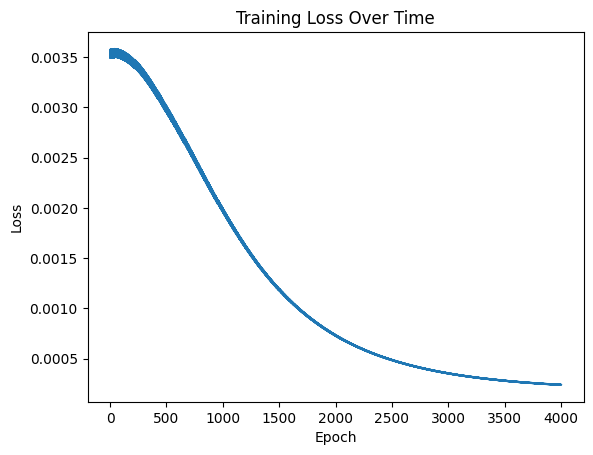

In [24]:
import matplotlib.pyplot as plt

losses = []

# Update training loop to store losses
for epoch in range(4000):
    predictions = model(X)
    loss = criterion(predictions, Y)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()


### Add Custom Activation Functions
Activation functions introduce non-linearity to the model, which is crucial for learning complex relationships. While PyTorch provides built-in activation functions, you can also define custom ones.

#### Use a Built-In Activation Function

In [25]:
class DeepNNWithSigmoid(nn.Module):
    def __init__(self):
        super(DeepNNWithSigmoid, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)
        self.activation = nn.Sigmoid()  # Use Sigmoid instead of ReLU

    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.output(x)
        return x

# Initialize and test this new model
model = DeepNNWithSigmoid()


#### Define a Custom Activation Function

In [27]:
class DeepNNWithCustomActivation(nn.Module):
    def __init__(self):
        super(DeepNNWithCustomActivation, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)

    def custom_activation(self, x):
        # Custom activation: Leaky ReLU with a fixed slope
        return torch.where(x > 0, x, 0.01 * x)

    def forward(self, x):
        x = self.custom_activation(self.hidden1(x))
        x = self.custom_activation(self.hidden2(x))
        x = self.output(x)
        return x

# Initialize the new model
model = DeepNNWithCustomActivation()


#### Visualize Model Predictions
Let’s visualize how well the model fits the data after training:

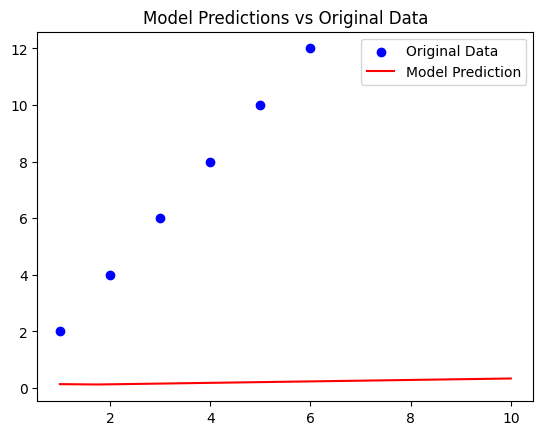

In [28]:
import matplotlib.pyplot as plt

# Generate predictions
with torch.no_grad():
    inputs = torch.linspace(1, 10, 100).reshape(-1, 1)  # Generate 100 points between 1 and 10
    predictions = model(inputs)

# Plot the results
plt.scatter(X.numpy(), Y.numpy(), label="Original Data", color="blue")
plt.plot(inputs.numpy(), predictions.numpy(), label="Model Prediction", color="red")
plt.legend()
plt.title("Model Predictions vs Original Data")
plt.show()


####  Transition to GPU

In [30]:
# Move model and data to GPU
device = torch.device("cuda")
model = model.to(device)
X = X.to(device)
Y = Y.to(device)

for epoch in range(4000):
    predictions = model(X)
    loss = criterion(predictions, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


### Add Regularization to Your Model
Regularization helps prevent overfitting by constraining the model's capacity.

#### Add Dropout Regularization
Dropout randomly disables neurons during training to prevent over-reliance on certain features:

In [37]:
class DeepNNWithDropout(nn.Module):
    def __init__(self):
        super(DeepNNWithDropout, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5)  # Dropout with 50% probability
        self.output = nn.Linear(10, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.activation(self.hidden2(x))
        x = self.dropout(x)  # Apply dropout
        x = self.output(x)
        return x

# Initialize the model with dropout
model = DeepNNWithDropout()


In [38]:
# Move model and data to GPU and train
device = torch.device("cuda")
model = model.to(device)
X = X.to(device)
Y = Y.to(device)

for epoch in range(4000):
    predictions = model(X)
    loss = criterion(predictions, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [40]:
# Test

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    test_X = torch.tensor([[4.0], [6.0]]).to(device)  # Example test inputs
    test_predictions = model(test_X)
    print(f"Predictions for {test_X.cpu().numpy()}: {test_predictions.cpu().numpy()}")


Predictions for [[4.]
 [6.]]: [[-0.15686135]
 [-0.16278069]]


### FULL CODE

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim

# Dataset
X = torch.rand(1000, 1) * 10  # 100 samples
Y = 2 * X + torch.randn(1000, 1)  # Linear relationship with noise

# Normalize data
X_mean, X_std = X.mean(), X.std()
Y_mean, Y_std = Y.mean(), Y.std()

X = (X - X_mean) / X_std
Y = (Y - Y_mean) / Y_std

# Move to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X = X.to(device)
Y = Y.to(device)

# Model without Dropout (simplified)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.output(x)
        return x

model = SimpleNN().to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjusted learning rate

# Training loop
for epoch in range(5000):  # Reduced epochs
    model.train()  # Enable training mode
    predictions = model(X)
    loss = criterion(predictions, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item():.6f}")

# Testing
model.eval()  # Disable dropout
with torch.no_grad():
  test_X = torch.tensor([[2.0], [4.0], [6.0], [8.0], [10.0]]).to(device)
  test_X = (test_X - X_mean) / X_std  # Normalize test data
  test_predictions = model(test_X)
  test_predictions = test_predictions * Y_std + Y_mean  # De-normalize predictions
  print(f"Test Predictions: {test_predictions.cpu().numpy()}")



Epoch 500, Loss: 0.031477
Epoch 1000, Loss: 0.030109
Epoch 1500, Loss: 0.030052
Epoch 2000, Loss: 0.030036
Epoch 2500, Loss: 0.030027
Epoch 3000, Loss: 0.030020
Epoch 3500, Loss: 0.030012
Epoch 4000, Loss: 0.030005
Epoch 4500, Loss: 0.029998
Epoch 5000, Loss: 0.029989
Test Predictions: [[ 3.9639568]
 [ 8.090665 ]
 [11.655995 ]
 [15.900648 ]
 [19.946861 ]]


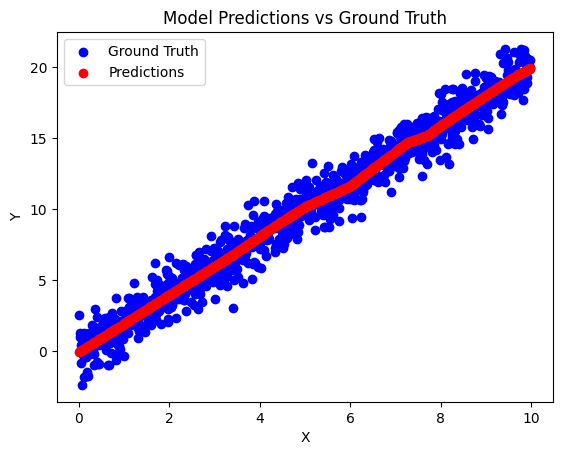

In [54]:
import matplotlib.pyplot as plt

# Denormalize X and Y for visualization
X_denorm = X.cpu().numpy() * X_std.cpu().numpy() + X_mean.cpu().numpy()
Y_denorm = Y.cpu().numpy() * Y_std.cpu().numpy() + Y_mean.cpu().numpy()

# Ground truth
plt.scatter(X_denorm, Y_denorm, label="Ground Truth", color='blue')

# Predictions
with torch.no_grad():
    predictions = model(X) * Y_std + Y_mean  # Denormalize predictions
    predictions_denorm = predictions.cpu().numpy()

plt.scatter(X_denorm, predictions_denorm, label="Predictions", color='red')

# Labels and Legend
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Model Predictions vs Ground Truth")
plt.show()



### Create Dynamic Datasets
For real-world problems, datasets often require preprocessing. Let’s simulate this with a dynamic dataset.

#### Custom Dataset with Transformation
Modify the dataset to add dynamic preprocessing:



In [55]:
class DynamicDataset(Dataset):
    def __init__(self, transform=None):
        self.X = torch.linspace(1, 10, 100).reshape(-1, 1)  # 100 points
        self.Y = 2 * self.X + 3  # Linear relationship
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        x, y = self.X[index], self.Y[index]
        if self.transform:
            x, y = self.transform(x), self.transform(y)  # Apply transformation
        return x, y

# Example transform (adding noise)
def add_noise(tensor):
    return tensor + torch.randn_like(tensor) * 0.1

# Create dataset with noise
dataset = DynamicDataset(transform=add_noise)
data_loader = DataLoader(dataset, batch_size=10, shuffle=True)


#### Train the model

In [58]:

# Linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Input size 1, output size 1

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
model = LinearRegressionModel()

# Define the loss function (Mean Squared Error)
loss_function = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Learning rate 0.01

# Training the model
num_epochs = 100  # Number of times to iterate over the dataset

for epoch in range(num_epochs):
    for batch_idx, (x_batch, y_batch) in enumerate(data_loader):
        # Forward pass: compute predictions
        predictions = model(x_batch)

        # Compute the loss
        loss = loss_function(predictions, y_batch)

        # Backward pass: compute gradients
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute new gradients

        # Update weights
        optimizer.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.3763
Epoch [20/100], Loss: 0.3289
Epoch [30/100], Loss: 0.2131
Epoch [40/100], Loss: 0.1433
Epoch [50/100], Loss: 0.1807
Epoch [60/100], Loss: 0.0905
Epoch [70/100], Loss: 0.1227
Epoch [80/100], Loss: 0.0185
Epoch [90/100], Loss: 0.0757
Epoch [100/100], Loss: 0.0427


#### Test the model

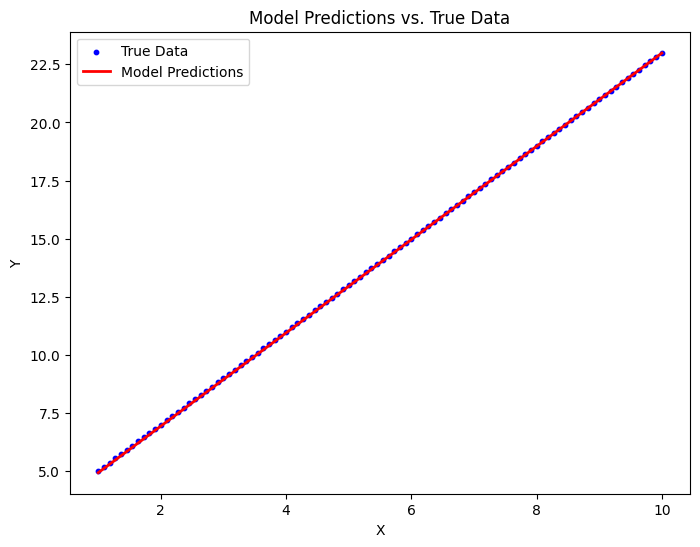

In [59]:
# Put the model in evaluation mode
model.eval()

# Generate test data
with torch.no_grad():  # No need to compute gradients during testing
    test_X = torch.linspace(1, 10, 100).reshape(-1, 1)  # 100 points
    test_Y = 2 * test_X + 3  # True relationship
    predicted_Y = model(test_X)  # Model predictions

# Plot the true data and predictions
plt.figure(figsize=(8, 6))
plt.scatter(test_X.numpy(), test_Y.numpy(), label="True Data", color="blue", s=10)
plt.plot(test_X.numpy(), predicted_Y.numpy(), label="Model Predictions", color="red", linewidth=2)
plt.title("Model Predictions vs. True Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
